In [ ]:
from google.colab import drive
import os
from PIL import Image
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing of the Images

In [ ]:
def image_preprocessing(img_folder, pre_folder, threshold_width, threshold_height):
  for i, indv_folder in enumerate(os.listdir(img_folder)):
    print("Folder {} by {} is in processing".format(i+1, indv_folder))    
    individual_folder = os.path.join(img_folder, indv_folder)
    for class_folder in os.listdir(individual_folder):
      os.rename(os.path.join(individual_folder, class_folder), os.path.join(individual_folder, class_folder.strip()))
      class_folder = class_folder.strip()
      target_class_dir = os.path.join(pre_folder, class_folder) 
      if not os.path.exists(target_class_dir):
        os.makedirs(target_class_dir)
      for image in os.listdir(os.path.join(individual_folder, class_folder)):
        try: 
          img = Image.open(os.path.join(individual_folder, class_folder, image))
          width, height = img.size
          if width >= threshold_width and height >= threshold_height: 
            if str(img.mode) != 'RGB':
              img = img.convert('RGB')
            new_name = os.path.join(target_class_dir, os.path.splitext(image)[0] + '.jpg')
            img.save(new_name, format = 'JPEG', quality = 100)
          else:
            invalid_class_dir = os.path.join(pre_folder, 'Invalid Images', class_folder)
            if not os.path.exists(invalid_class_dir):
              os.makedirs(invalid_class_dir)
            img_dir = os.path.join(invalid_class_dir, image)
            img.save(img_dir)
        except:
          continue
    print("Folder {} by {} is processed".format(i+1, indv_folder))

In [ ]:
img_folder = '/content/drive/MyDrive/Road_Safety/task_0_data_collection'
# pre_path = '/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Shahroz Preprocessed Images'
pre_path = '/content/Shahroz Preprocessed Images'
if not os.path.exists(pre_path):
  os.makedirs(pre_path)
pre_folder = pre_path
threshold_width = 300
threshold_height = 300
image_preprocessing(img_folder, pre_folder, threshold_width, threshold_height)

Folder 0 by Samples is preprocessing
Folder 0 by Samples is processed
Folder 1 by Mohammad Usman Sheikh is preprocessing
Folder 1 by Mohammad Usman Sheikh is processed
Folder 2 by Chithra Janardhana is preprocessing
Folder 2 by Chithra Janardhana is processed
Folder 3 by Efrem Assefa is preprocessing
Folder 3 by Efrem Assefa is processed
Folder 4 by Shubham is preprocessing
Folder 4 by Shubham is processed
Folder 5 by El Hassan Outlaouait is preprocessing
Folder 5 by El Hassan Outlaouait is processed
Folder 6 by Muhammad Shahroz is preprocessing
Folder 6 by Muhammad Shahroz is processed
Folder 7 by Satvik Tejas is preprocessing
Folder 7 by Satvik Tejas is processed
Folder 8 by Doktur is preprocessing
Folder 8 by Doktur is processed
Folder 9 by Ataliba Miguel is preprocessing
Folder 9 by Ataliba Miguel is processed
Folder 10 by Jamaludeen  is preprocessing
Folder 10 by Jamaludeen  is processed
Folder 11 by Nimmi is preprocessing
Folder 11 by Nimmi is processed
Folder 12 by Christo Mathe

## Format Check

In [12]:
from PIL import Image
import shutil
img_folder = "/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images/Rut (ready)"
for image in os.listdir(img_folder):
  img = Image.open(os.path.join(img_folder, image))
  if img.format != "JPEG":
    if str(img.mode) != 'RGB':
      img = img.convert('RGB') 
    new_name = os.path.join(img_folder, os.path.splitext(image)[0] + '.jpg')
    img.save(new_name, format = 'JPEG', quality = 100)
    shutil.move(os.path.join(img_folder, image), "/content/png images")
    print(image, new_name)

In [13]:
import os
pre_path = "/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images"
for dirpath, dirnames, filenames in os.walk(pre_path):
  print("There are {} directories and {} images in '{}'.".format(len(dirnames), len(filenames), dirpath))

There are 5 directories and 0 images in '/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images'.
There are 1 directories and 1037 images in '/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images/Cracks (no further action)'.
There are 2 directories and 0 images in '/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images/Cracks (no further action)/Not_Crack'.
There are 0 directories and 3 images in '/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images/Cracks (no further action)/Not_Crack/possible_rut'.
There are 0 directories and 20 images in '/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images/Cracks (no further action)/Not_Crack/No_crack_processing'.
There are 0 directories and 2425 images in '/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/

## Rename of the Images 

In [ ]:
path = "/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images"
for subfolder in os.listdir(path):
  for i, image in enumerate(os.listdir(os.path.join(path, subfolder))):
    os.rename(os.path.join(path, subfolder, image), os.path.join(path, subfolder) + "/" + subfolder + "_" + str(i+1))

## EDA of the Images

In [ ]:
number_classes = {}
path = "/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images"
for img_class in os.listdir(path):
  number_classes[img_class] = len(os.listdir(os.path.join(path, img_class)))
print(number_classes)

{'Rut': 194, 'Cracks': 1139, 'Subsidence': 482, 'Groove': 2970}


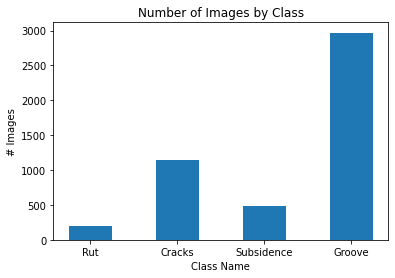

In [ ]:
import matplotlib.pyplot as plt
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

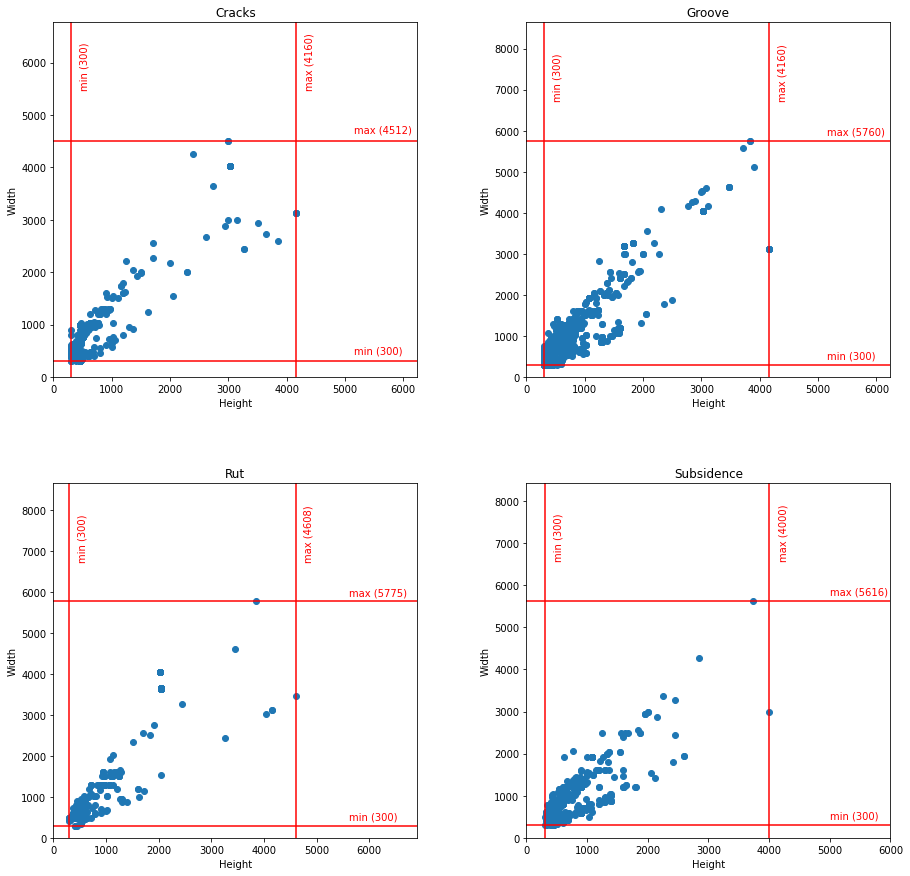

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.3)
axs = axs.ravel()

for i, img_class in enumerate(os.listdir(path)):
  x = []
  y = []
  class_dir = os.path.join(path, img_class)
  for img in os.listdir(class_dir):
    img = Image.open(os.path.join(class_dir, img))
    x.append(img.height)
    y.append(img.width)
  axs[i].scatter(x, y)
  axs[i].axhline(y = min(y), color = 'r', linestyle = '-')
  axs[i].text(max(x) + 1000, min(y) + 150, 'min ({})'.format(min(y)), color = 'r')
  axs[i].axhline(y = max(y), color = 'r', linestyle = '-')
  axs[i].text(max(x) + 1000, max(y) + 150, 'max ({})'.format(max(y)), color = 'r')
  axs[i].axvline(x = min(x), color = 'r', linestyle = '-')
  axs[i].text(min(x) + 150, max(y) + 1000,'min ({})'.format(min(x)), color = 'r', rotation=90)
  axs[i].axvline(x = max(x), color = 'r', linestyle = '-')
  axs[i].text(max(x) + 150, max(y) + 1000,'max ({})'.format(max(x)), color = 'r', rotation=90)
  axs[i].set_xlabel("Height")
  axs[i].set_ylabel("Width")
  axs[i].set_title(img_class)
  axs[i].set_xlim([0, 1.5*max(x)])
  axs[i].set_ylim([0, 1.5*max(y)])

## Visual Inspection of Images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil

target_class = "Groove"

source_path = "/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Shahroz Processed Images/" + target_class
dest_path = "/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Visually Rejected Images/"  + target_class
if not os.path.exists(dest_path):
  os.makedirs(dest_path)
iterator_list = iter(os.listdir(source_path))
print(os.listdir(source_path))

['Groove_2018.jpg', 'Groove_2019.jpg', 'Groove_2020.jpg', 'Groove_2021.jpg', 'Groove_2022.jpg', 'Groove_2023.jpg', 'Groove_2024.jpg', 'Groove_2025.jpg', 'Groove_2026.jpg', 'Groove_2027.jpg', 'Groove_2028.jpg', 'Groove_2029.jpg', 'Groove_2030.jpg', 'Groove_2031.jpg', 'Groove_2032.jpg', 'Groove_2033.jpg', 'Groove_2034.jpg', 'Groove_2035.jpg', 'Groove_2036.jpg', 'Groove_2037.jpg', 'Groove_2038.jpg', 'Groove_2039.jpg', 'Groove_2040.jpg', 'Groove_2041.jpg', 'Groove_2042.jpg', 'Groove_2043.jpg', 'Groove_2044.jpg', 'Groove_2045.jpg', 'Groove_2046.jpg', 'Groove_2047.jpg', 'Groove_2048.jpg', 'Groove_2049.jpg', 'Groove_2050.jpg', 'Groove_2051.jpg', 'Groove_2052.jpg', 'Groove_2053.jpg', 'Groove_2054.jpg', 'Groove_2055.jpg', 'Groove_2056.jpg', 'Groove_2057.jpg', 'Groove_2058.jpg', 'Groove_2059.jpg', 'Groove_2060.jpg', 'Groove_2061.jpg', 'Groove_2062.jpg', 'Groove_2063.jpg', 'Groove_2064.jpg', 'Groove_2065.jpg', 'Groove_2066.jpg', 'Groove_2067.jpg', 'Groove_2068.jpg', 'Groove_2069.jpg', 'Groove_207

(-0.5, 799.5, 515.5, -0.5)

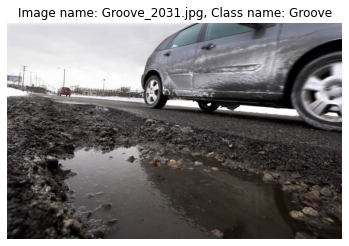

In [ ]:
image_name = next(iterator_list)
image = mpimg.imread(os.path.join(source_path, image_name))
plt.imshow(image)
plt.title("Image name: {}, Class name: {}".format(image_name, target_class))
plt.axis(False)

In [ ]:
shutil.move(os.path.join(source_path, image_name), os.path.join(dest_path, image_name))

'/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Visually Rejected Images/Rut/Rut_5.jpg'

## Duplicate Finding

In [ ]:
import os
from PIL import Image, ImageStat
import shutil

image_folder = "/content/drive/MyDrive/Road_Safety/task_1_data_preprocessing/processed_images/Final Processed Images/Rut"
image_files = [_ for _ in os.listdir(image_folder)]
print(image_files)

['Subsidence_485.jpg', 'Rut_1.jpg', 'Rut_2.jpg', 'Rut_3.jpg', 'Rut_4.jpg', 'Rut_5.jpg', 'Rut_7.jpg', 'Rut_8.jpg', 'Rut_9.jpg', 'Rut_10.jpg', 'Rut_11.jpg', 'Rut_12.jpg', 'Rut_13.jpg', 'Rut_14.jpg', 'Rut_17.jpg', 'Rut_18.jpg', 'Rut_19.jpg', 'Rut_20.jpg', 'Rut_21.jpg', 'Rut_22.jpg', 'Rut_23.jpg', 'Rut_24.jpg', 'Rut_26.jpg', 'Rut_27.jpg', 'Rut_28.jpg', 'Rut_29.jpg', 'Rut_30.jpg', 'Rut_31.jpg', 'Rut_32.jpg', 'Rut_33.jpg', 'Rut_34.jpg', 'Rut_35.jpg', 'Rut_36.jpg', 'Rut_37.jpg', 'Rut_38.jpg', 'Rut_39.jpg', 'Rut_40.jpg', 'Rut_41.jpg', 'Rut_42.jpg', 'Rut_43.jpg', 'Rut_44.jpg', 'Rut_45.jpg', 'Rut_46.jpg', 'Rut_47.jpg', 'Rut_48.jpg', 'Rut_49.jpg', 'Rut_50.jpg', 'Rut_51.jpg', 'Rut_52.jpg', 'Rut_53.jpg', 'Rut_54.jpg', 'Rut_56.jpg', 'Rut_57.jpg', 'Rut_58.jpg', 'Rut_59.jpg', 'Rut_60.jpg', 'Rut_61.jpg', 'Rut_63.jpg', 'Rut_64.jpg', 'Rut_65.jpg', 'Rut_66.jpg', 'Rut_67.jpg', 'Rut_68.jpg', 'Rut_69.jpg', 'Rut_70.jpg', 'Rut_71.jpg', 'Rut_72.jpg', 'Rut_73.jpg', 'Rut_75.jpg', 'Rut_76.jpg', 'Rut_77.jpg', 'Rut_

In [ ]:
duplicate_files = []
for i, file_org in enumerate(image_files):
    if not file_org in duplicate_files:
        image_org = Image.open(os.path.join(image_folder, file_org))
        pix_mean1 = ImageStat.Stat(image_org).mean
        
        for file_check in image_files:
            if file_check != file_org:
                image_check = Image.open(os.path.join(image_folder, file_check))
                pix_mean2 = ImageStat.Stat(image_check).mean

                if pix_mean1 == pix_mean2:
                    duplicate_files.append(file_check)      
    print("{}/{}".format(i+1, len(image_files)))
print(duplicate_files)

1/304
2/304
3/304
4/304
5/304
6/304
7/304
8/304
9/304
10/304
11/304
12/304
13/304
14/304
15/304
16/304
17/304
18/304
19/304
20/304
21/304
22/304
23/304
24/304
25/304
26/304
27/304
28/304
29/304
30/304
31/304
32/304
33/304
34/304
35/304
36/304
37/304
38/304
39/304
40/304
41/304
42/304
43/304
44/304
45/304
46/304
47/304
48/304
49/304
50/304
51/304
52/304
53/304
54/304
55/304
56/304
57/304
58/304
59/304
60/304
61/304
62/304
63/304
64/304
65/304
66/304
67/304
68/304
69/304
70/304
71/304
72/304
73/304
74/304
75/304
76/304
77/304
78/304
79/304
80/304
81/304
82/304
83/304
84/304
85/304
86/304
87/304
88/304
89/304
90/304
91/304
92/304
93/304
94/304
95/304
96/304
97/304
98/304
99/304
100/304
101/304
102/304
103/304
104/304
105/304
106/304
107/304
108/304
109/304
110/304
111/304
112/304
113/304
114/304
115/304
116/304
117/304
118/304
119/304
120/304
121/304
122/304
123/304
124/304
125/304
126/304
127/304
128/304
129/304
130/304
131/304
132/304
133/304
134/304
135/304
136/304
137/304
138/304
139/

In [ ]:
dest_folder = "/content/Duplicate Images"
if not os.path.exists(dest_folder):
  os.makedirs(dest_folder)
for f in duplicate_files:
    shutil.move(os.path.join(image_folder, f), os.path.join(dest_folder, f))